<font color=red size=7> Data Scientist </font>AHMETKURT

# HAUSE PRICE PREDICTION / <font color=green size=5> ALANYA </font>
# Business Objective
#### Log on to www.hepsiemlak.com and webscrape the rent listings and create a regression model to predict rent prices in your city where you live right now.

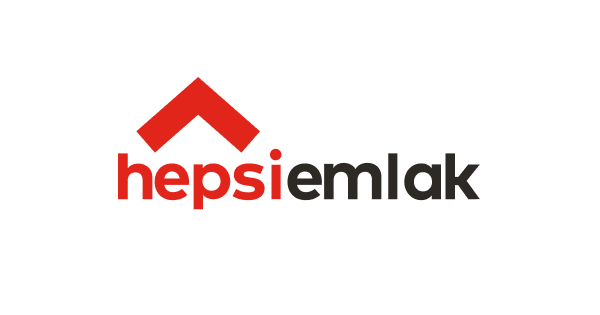

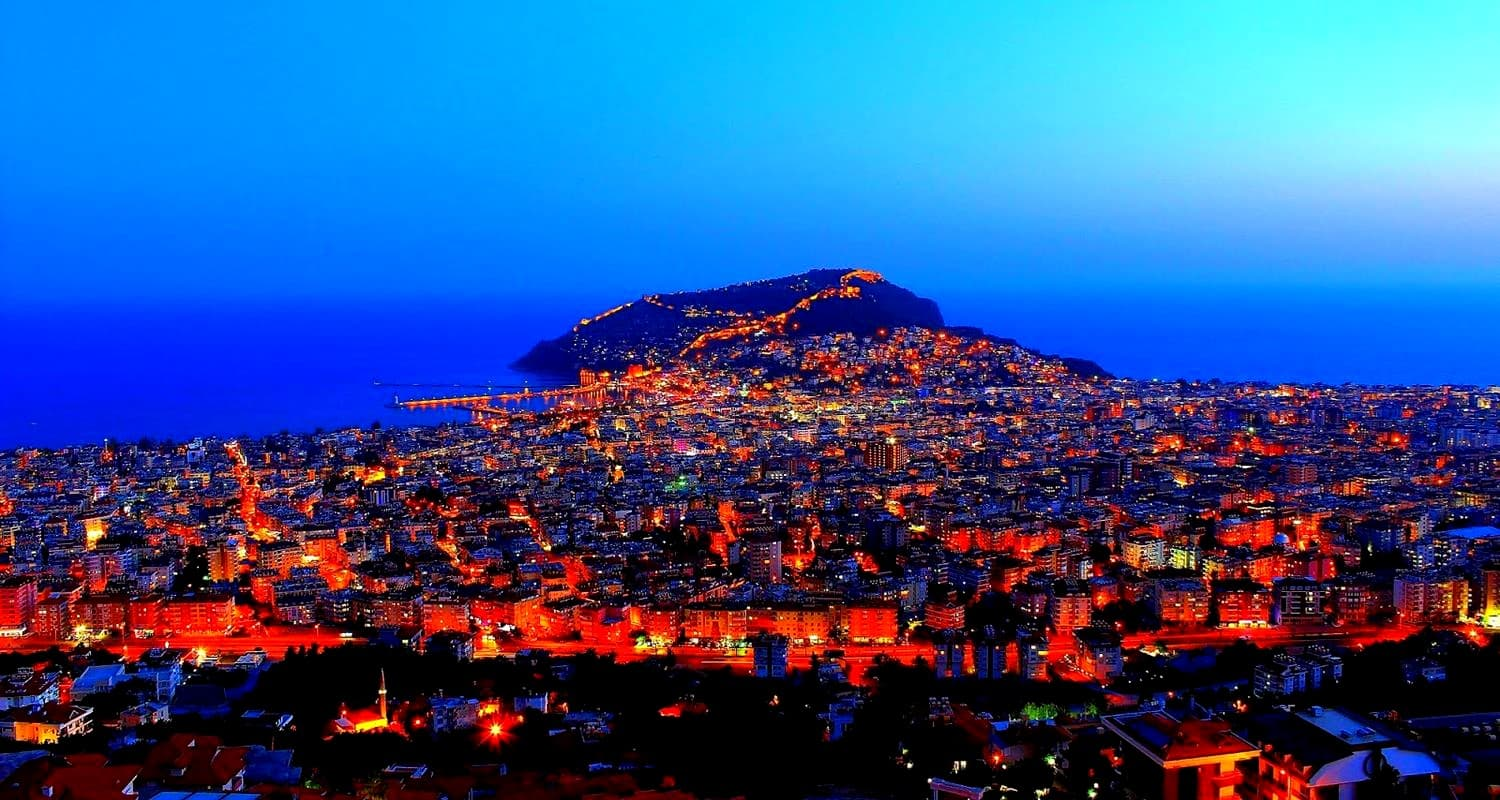

In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
from csv import writer
import re
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',100)

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()

from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [2]:
def algo_test(x,y):

        
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        GBR=GradientBoostingRegressor()
        XGBC=XGBRegressor()
        kn=KNeighborsRegressor()
        
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=13)
        
        algos=[R,Lass,E,GBR,XGBC,kn]
        algo_names=['Ridge','Lasso','ElasticNet','Gradient Boosting','XGradientBoosting','KNeighbors']
        
        r2Score = []
        rmse = []
        mae = []
        
        result=pd.DataFrame(columns=['R2_score','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r2Score.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            
        result['R2_score']=r2Score 
        result.RMSE=rmse
        result.MAE=mae


        return result.sort_values('R2_score',ascending=False)


In [3]:
def house_scraping(url,csv):
    #url = "https://www.hepsiemlak.com/antalya-kiralik"
    page = requests.get(url)
    
    soup = BeautifulSoup(page.content,'html.parser')
    lists = soup.find_all('li',class_="listing-item")
    
    with open(csv,'a',encoding='utf8',newline='') as f:
        csv_writer = writer(f)
        header = ['Description','Weekend','Area','Age','Floor','Price']
        csv_writer.writerow(header)
        for list in lists:
            description = list.find('header',class_ = 'list-view-header').text.replace('\n','')
            weekend = list.find('span',class_ = 'celly houseRoomCount').text.replace('\n','')
            area = list.find('span',class_ = 'celly squareMeter list-view-size').text.replace('\n','')
            age = list.find('span',class_ = 'celly buildingAge').text.replace('\n','')
            floor = list.find('span',class_ = 'celly floortype').text.replace('\n','')
            price = list.find('span',class_ = 'list-view-price').text.replace('\n','')
            info = [description,weekend,area,age,floor,price]
            csv_writer.writerow(info)

In [4]:
def county(name,page):

    for i in range(page):
        if i == 0:
            house_scraping(url=f"https://www.hepsiemlak.com/{name}-kiralik",csv=f"hepsiemlak_{name}.csv")
        else:
            house_scraping(url=f"https://www.hepsiemlak.com/{name}-kiralik?page={i+1}",csv=f"hepsiemlak_{name}.csv")

# Scrape the Data and Read the Data 

In [5]:
county("alanya",10)#Write the city name and the number of advertisements on the site
df = pd.read_csv("hepsiemlak_alanya.csv")
df

,Description,Weekend,Area,Age,Floor,Price
0,alanya kestel mahalles...,4 + 1,170 m2,9 Yaşında,En Üst Kat,10.000 TL
1,alanya kestel mahalles...,4 + 1,170 m2,9 Yaşında,Çatı Katı,10.000 TL
2,alanya oba'da kiralık ...,1 + 1,55 m2,18 Yaşında,2. Kat,8.000 TL
3,alanya kestel mahalles...,1 + 1,60 m2,3 Yaşında,3. Kat,5.500 TL
4,alanya da kiralık eşya...,1 + 1,55 m2,Sıfır Bina,4. Kat,7.500 TL
...,...,...,...,...,...,...
4805,miran emlak güvencesi ...,5 + 2,650 m2,3 Yaşında,NaN,3.500 TL
4806,avsallarda eşyalı kira...,2 + 1,95 m2,8 Yaşında,Yüksek Giriş,15.000 TL
4807,alanya cikcilli'de sit...,1 + 1,70 m2,12 Yaşında,5. Kat,1.200 TL
4808,alanya incekum mahalle...,3 + 1,140 m2,3 Yaşında,NaN,4.000 TL


# EXPLORATORY DATA ANALYSIS

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  4802 non-null   object
 1   Weekend      4810 non-null   object
 2   Area         4810 non-null   object
 3   Age          4810 non-null   object
 4   Floor        4356 non-null   object
 5   Price        4810 non-null   object
dtypes: object(6)
memory usage: 225.6+ KB


In [7]:
df.isnull().sum()

Description      8
Weekend          0
Area             0
Age              0
Floor          454
Price            0
dtype: int64

In [8]:
df.Weekend.value_counts()

2 + 1      2484
1 + 1       981
3 + 1       747
Weekend     192
4 + 1       159
5 + 1       135
3 + 2        59
5 + 2        34
4 + 2        19
Name: Weekend, dtype: int64

In [9]:
df.Area.value_counts()# delete 'm2' int

                          110 m2    483
                          120 m2    455
                          100 m2    328
                          90 m2     227
                          130 m2    217
                          65 m2     214
                          70 m2     207
                          125 m2    195
Area                                192
                          55 m2     171
                          60 m2     153
                          140 m2    152
                          150 m2    140
                          105 m2    136
                          75 m2     133
                          115 m2    121
                          80 m2     117
                          95 m2     111
                          160 m2    101
                          135 m2     99
                          85 m2      90
                          200 m2     79
                          220 m2     74
                          170 m2     62
                          180 m2     59


In [10]:
df.Age.value_counts()# delete the 'Yaşında' , convert  'Sıfır bina' int

5 Yaşında     540
10 Yaşında    515
15 Yaşında    479
7 Yaşında     306
Sıfır Bina    304
20 Yaşında    253
8 Yaşında     236
4 Yaşında     232
25 Yaşında    222
3 Yaşında     196
Age           192
1 Yaşında     178
2 Yaşında     176
6 Yaşında     150
12 Yaşında    143
18 Yaşında     96
16 Yaşında     95
26 Yaşında     78
13 Yaşında     78
22 Yaşında     54
9 Yaşında      40
17 Yaşında     40
11 Yaşında     35
19 Yaşında     20
29 Yaşında     20
28 Yaşında     20
35 Yaşında     20
21 Yaşında     20
27 Yaşında     19
30 Yaşında     19
32 Yaşında     19
40 Yaşında     15
Name: Age, dtype: int64

In [11]:
df.Floor.value_counts()# converrt to number, int

                      3. Kat          684
                      4. Kat          648
                      2. Kat          628
                      5. Kat          439
                      1. Kat          360
                      Ara Kat         360
Floor                                 192
                      7. Kat          170
                      Bahçe Katı      157
                      Yüksek Giriş    150
                      8. Kat           94
                      6. Kat           81
                      En Üst Kat       78
                      Giriş Katı       40
                      Çatı Katı        39
                      Teras Katı       39
                      Kot 2            39
                      Zemin            36
                      9. Kat           34
                      Kot 3            20
                      Villa Katı       19
                      15. Kat          19
                      10. Kat          15
                      Kot 1       

In [12]:
df.Price.value_counts()# delete 'TL' and '.'

              10.000              TL    272
              11.000              TL    255
              8.000              TL     207
Price                                   192
              18.000              TL    187
                                       ... 
              16.452              TL     15
              13.250              TL     15
              1.200              TL      15
              4.000              TL      14
              800              TL         2
Name: Price, Length: 95, dtype: int64

In [13]:
df.Weekend.unique()

array(['4 + 1', '1 + 1', '3 + 1', '2 + 1', '5 + 1', '3 + 2', 'Weekend',
       '5 + 2', '4 + 2'], dtype=object)

In [14]:
df.Age.unique()

array(['9 Yaşında', '18 Yaşında', '3 Yaşında', 'Sıfır Bina', '6 Yaşında',
       '35 Yaşında', '5 Yaşında', '20 Yaşında', '10 Yaşında', '8 Yaşında',
       '29 Yaşında', '25 Yaşında', '12 Yaşında', 'Age', '15 Yaşında',
       '26 Yaşında', '2 Yaşında', '4 Yaşında', '19 Yaşında', '17 Yaşında',
       '16 Yaşında', '7 Yaşında', '11 Yaşında', '1 Yaşında', '13 Yaşında',
       '28 Yaşında', '22 Yaşında', '21 Yaşında', '27 Yaşında',
       '30 Yaşında', '32 Yaşında', '40 Yaşında'], dtype=object)

In [15]:
df.Area.unique()

array(['                          170 m2',
       '                          55 m2',
       '                          60 m2',
       '                          150 m2',
       '                          350 m2',
       '                          155 m2',
       '                          120 m2',
       '                          115 m2',
       '                          110 m2',
       '                          250 m2',
       '                          180 m2',
       '                          90 m2',
       '                          210 m2',
       '                          100 m2',
       '                          105 m2',
       '                          65 m2', 'Area',
       '                          160 m2',
       '                          125 m2',
       '                          75 m2',
       '                          400 m2',
       '                          190 m2',
       '                          140 m2',
       '                          80 m2',
       ' 

In [16]:
df.Price.unique()

array(['              10.000              TL',
       '              8.000              TL',
       '              5.500              TL',
       '              7.500              TL',
       '              13.500              TL',
       '              6.000              TL',
       '              3.000              TL',
       '              9.100              TL',
       '              8.250              TL',
       '              20.000              TL',
       '              21.000              TL',
       '              14.000              TL',
       '              15.000              TL',
       '              6.500              TL',
       '              12.000              TL',
       '              12.800              TL',
       '              700              TL',
       '              7.250              TL', 'Price',
       '              14.500              TL',
       '              9.750              TL',
       '              7.400              TL',
       '          

# FEATURE ENGINEERING AND DATA VISUALIZATIONS

In [17]:
df['Weekend'].replace({'[^0-9]+':''},regex=True,inplace=True)


#ml = []
#for i in range(len(df)):
#    if df.Weekend.iloc[i] == "Weekend":
#        ml.append(i)
        
#df = df.drop(ml)
#df.Weekend.value_counts()

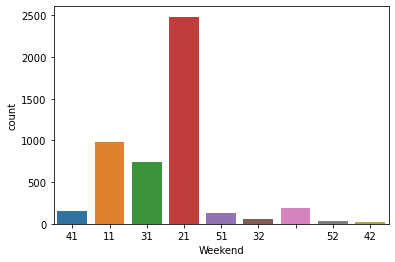

In [18]:
sns.countplot(df.Weekend);

In [19]:
#df['Area'].replace({' m2':''},regex=True,inplace=True)
#one liner of the code below


for i in range(len(df)):
    try:
        df.Area.iloc[i] = int(re.split(r"\s+",df.Area.iloc[i])[1])
    except:
        
        pass
    
for i in range(len(df)):
    try:
        if type(df.Area.iloc[i]) == str:
            df = df.drop(i)
    except:
        pass

<AxesSubplot:>

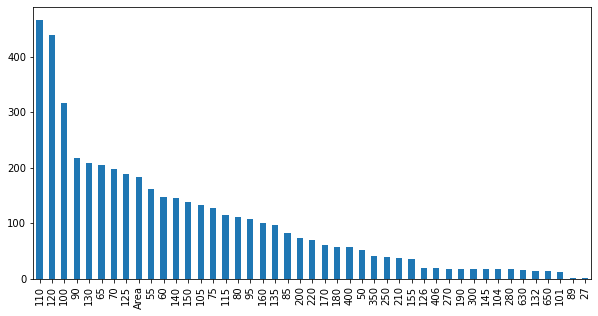

In [23]:
plt.figure(figsize=(10,5))
df["Area"].value_counts().plot.bar()

In [22]:
df['Age'].replace({' Yaşında':'','Sıfır Bina':0},regex=True,inplace=True)
#one liner of the code below

#for i in range(len(df)):
#    if df.Age.iloc[i] == "Sıfır Bina":
#        df.Age.iloc[i] = 0
#    else:
#        df.Age.iloc[i] = int(re.split(r"\s+",df.Age.iloc[i])[0])
#df.Age.value_counts().sort_index(ascending=True)

<AxesSubplot:>

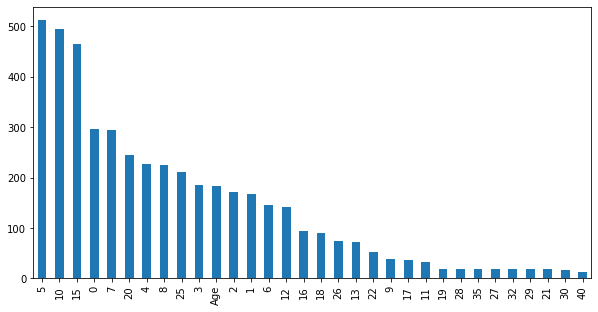

In [24]:
plt.figure(figsize=(10,5))
df["Age"].value_counts().plot.bar()

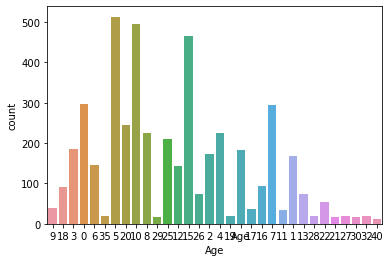

In [25]:
sns.countplot(df.Age);

In [26]:
df.Floor.value_counts()

                      3. Kat          656
                      4. Kat          614
                      2. Kat          608
                      5. Kat          427
                      1. Kat          345
                      Ara Kat         342
Floor                                 184
                      7. Kat          167
                      Bahçe Katı      150
                      Yüksek Giriş    144
                      8. Kat           87
                      6. Kat           75
                      En Üst Kat       73
                      Çatı Katı        39
                      Kot 2            39
                      Teras Katı       38
                      Giriş Katı       38
                      9. Kat           34
                      Zemin            34
                      Kot 3            19
                      Villa Katı       19
                      15. Kat          19
                      10. Kat          13
                      Kot 1       

In [27]:
#df['Floor'].replace({'. Kat':'','Ara Kat':'7','Bahçe Katı':'0','Yüksek Giriş':'0',
#                     'En Üst Kat':'15','Giriş Katı':'0','Çatı Katı':'15','Teras Katı':'15'
#                     ,'Kot 2':'2','Zemin':'0','Kot 3':'3','Villa Katı':'3','Kot 1':'1'})

#one liner of the code below

floor_list = []
for i in range(len(df)):
    try:
        df.Floor.iloc[i] = int(re.split(r"[-;,.\s]\s*",df.Floor.iloc[i])[1])
    except:
        pass

for i in range(len(df)):
    try:
        value = re.split(r"[-;,.\s]\s*",df.Floor.iloc[i])[1]
        if value == "Bahçe":
            df.Floor.iloc[i] = 0
        elif value == "Giriş":
            df.Floor.iloc[i] = 0
        elif value == "Yüksek":
            df.Floor.iloc[i] = 0
        elif value == "Zemin":
            df.Floor.iloc[i] = 0
    except:
        pass
    
k = 0
t = 0
for i in range(len(df)):
    if type(df.Floor.iloc[i]) == int:
        k = k + df.Floor.iloc[i]
        t = t + 1
mid_layer = int(k/t)
for i in range(len(df)):
    try:
        value = re.split(r"[-;,.\s]\s*",df.Floor.iloc[i])[1]
        if value == "Ara":
            df.Floor.iloc[i] = mid_layer
        elif value == "Çatı":
            df.Floor.iloc[i]=15
        elif value == "Teras":
            df.Floor.iloc[i]=15
        elif value == "Kot 1":
            df.Floor.iloc[i]=1            
        elif value == "Kot 2":
            df.Floor.iloc[i]=2            
        elif value == "Kot 3":
            df.Floor.iloc[i]=3            
        elif value == "Villa Katı":
            df.Floor.iloc[i]=3            
            
        elif value == "En":
            df.Floor.iloc[i] = 15
    except:
        pass
    
    
drop_list = []
for i in range(len(df)):
    if type(df.Floor.iloc[i]) == str:
        drop_list.append(i)
df = df.drop(df.index[[drop_list]])

In [28]:
df.Floor.value_counts()

3     998
4     614
2     608
5     427
0     366
1     345
15    169
7     167
8      87
6      75
9      34
10     13
Name: Floor, dtype: int64

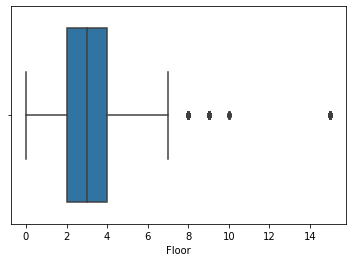

In [29]:
sns.boxplot(df.Floor);

<AxesSubplot:ylabel='Floor'>

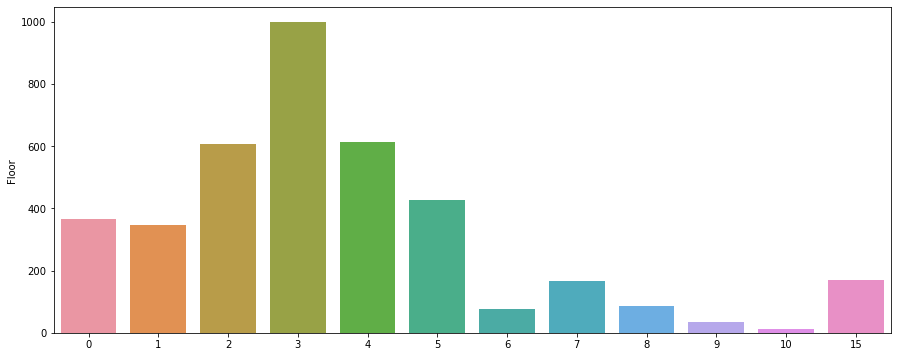

In [30]:
plt.figure(figsize=(15,6))
sns.barplot(x=df.Floor.value_counts().index,y=df.Floor.value_counts())


In [31]:
#df.Price = df.Price.str.replace("TL", "").str.replace("\n", "").str.replace(".", "").astype("int64")
#one liner of the code below

for i in range(len(df)):
    value = re.split(r"[-;,.\s]\s*",df.Price.iloc[i])[1:3]
    df.Price.iloc[i] = int(value[0]) * 1000

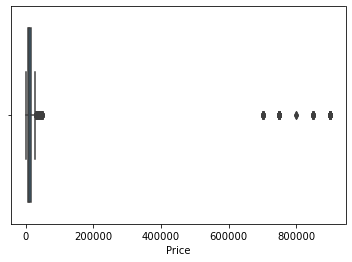

In [32]:
sns.boxplot(df.Price);

<AxesSubplot:xlabel='Price', ylabel='Density'>

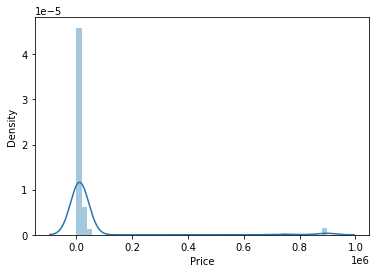

In [33]:
sns.distplot(df['Price'])

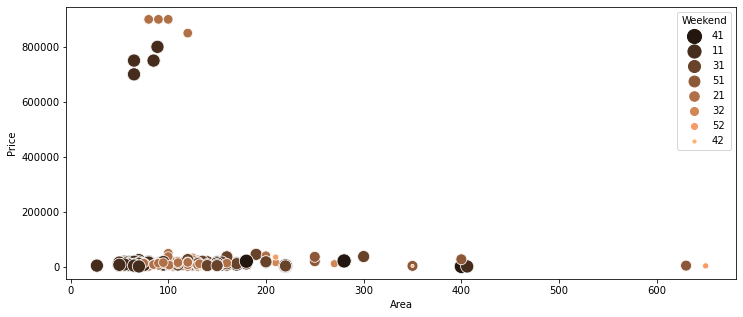

In [34]:
plt.figure(figsize=(12,5))
ax = sns.scatterplot(x="Area", y="Price",
                     hue="Weekend", size ="Weekend",
                     palette='copper', sizes=(10, 200),
                     data=df)
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [35]:
df.head()

,Description,Weekend,Area,Age,Floor,Price
0,alanya kestel mahalles...,41,170,9,15,10000
1,alanya kestel mahalles...,41,170,9,15,10000
2,alanya oba'da kiralık ...,11,55,18,2,8000
3,alanya kestel mahalles...,11,60,3,3,5000
4,alanya da kiralık eşya...,11,55,0,4,7000


In [36]:
df.isnull().sum()

Description      8
Weekend          0
Area             0
Age              0
Floor          441
Price            0
dtype: int64

In [37]:
df.Floor.unique()

array([15, 2, 3, 4, nan, 1, 6, 0, 5, 8, 7, 9, 10], dtype=object)

In [38]:
df['Floor'].fillna((df['Floor'].mean()), inplace=True)

In [39]:
df.isnull().sum()

Description    8
Weekend        0
Area           0
Age            0
Floor          0
Price          0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4344 entries, 0 to 4809
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  4336 non-null   object 
 1   Weekend      4344 non-null   object 
 2   Area         4344 non-null   object 
 3   Age          4344 non-null   object 
 4   Floor        4344 non-null   float64
 5   Price        4344 non-null   object 
dtypes: float64(1), object(5)
memory usage: 237.6+ KB


In [43]:
df.Weekend = df.Weekend.astype("float64")


In [44]:
df.Area = df.Area.astype("float64")


In [45]:
df.Age = df.Age.astype("float64")


In [46]:
df.Price = df.Price.astype("float64")


# NATURAL LANGUAGE PROCESSİNG - WORD CLOUD

In [47]:
df['Description']=df['Description'].str.lower()
df['Description']=df['Description'].str.replace("[^\w\s]","") #noktalama işaretlerini kaldırı
df['Description']=df['Description'].str.replace("\d+","") #d digit rakamları kaldır
df['Description']=df['Description'].str.replace("\n"," ").replace("\r","") #Satır sonu,\n enter a basılmışsa \r

In [48]:
df['Description']=df['Description'].str.replace("   ", "")

In [49]:
df.Description

0       alanya kestel mahallesinde kiralık  dublex dai...
1       alanya kestel mahallesinde kiralık  dublex daire 
2           alanya obada kiralık  eşyalı daire denize mt 
3           alanya kestel mahallesinde kiralık  daireler 
4              alanya da kiralık eşyalı dairem  avsallar 
                              ...                        
4805    miran emlak güvencesi ile siz değerli misafirl...
4806                          avsallarda eşyalı kiralık  
4807    alanya cikcillide site içerisinde  mobilyalı g...
4808      alanya incekum mahallesi günlük kiralık  villa 
4809    alanya kargıcakda günlük aylık yıllık kiralık ...
Name: Description, Length: 4344, dtype: object

In [50]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [51]:
from wordcloud import WordCloud
def wc(data,bgcolor):
    from PIL import Image
    mask = np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor, width=800, height=400,mask=mask,max_words=100).generate(' '.join(data))
    plt.figure( figsize=(20,10) )
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [ ]:
wc(df["Description"],'white')

In [53]:
df.quantile(.97).astype('float64')

Weekend        51.0
Area          300.0
Age            26.0
Floor          15.0
Price      800000.0
Name: 0.97, dtype: float64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4344 entries, 0 to 4809
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Description  4336 non-null   object 
 1   Weekend      4344 non-null   float64
 2   Area         4344 non-null   float64
 3   Age          4344 non-null   float64
 4   Floor        4344 non-null   float64
 5   Price        4344 non-null   float64
dtypes: float64(5), object(1)
memory usage: 237.6+ KB


In [55]:
df = pd.get_dummies(df, drop_first=True)

# REGRESSION

In [56]:
y=df.Price

In [57]:
x=df.drop("Price",axis=1)

In [58]:
pred=gb.fit(x,y).predict(x)

In [59]:
r2_score(y,pred)

0.9972186313383468

In [60]:
algo_test(x,y)

,R2_score,RMSE,MAE
Lasso,0.999981,780.587706,420.677749
XGradientBoosting,0.999933,1474.885827,1306.823469
Gradient Boosting,0.996579,10543.070063,7055.485607
Ridge,0.986810,20701.769019,4764.606580
KNeighbors,0.972237,30034.377238,1460.229885
ElasticNet,0.041307,176491.548851,73047.703362


# DEEP LEARNING

In [61]:
x = scaler.fit_transform(x)


In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=7)


In [63]:
model=Sequential()
model.add(Dense(81, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(27, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')

In [64]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),verbose=1,epochs=100)

Epoch 1/100
95/95 [==============================] - 1s 4ms/step - loss: 31256115200.0000 - val_loss: 31437000704.0000
Epoch 2/100
95/95 [==============================] - 0s 2ms/step - loss: 31060410368.0000 - val_loss: 30720059392.0000
Epoch 3/100
95/95 [==============================] - 0s 2ms/step - loss: 29398433792.0000 - val_loss: 28828274688.0000
Epoch 4/100
95/95 [==============================] - 0s 2ms/step - loss: 28172687360.0000 - val_loss: 27787849728.0000
Epoch 5/100
95/95 [==============================] - 0s 2ms/step - loss: 26817214464.0000 - val_loss: 26023311360.0000
Epoch 6/100
95/95 [==============================] - 0s 2ms/step - loss: 23752527872.0000 - val_loss: 20961667072.0000
Epoch 7/100
95/95 [==============================] - 0s 2ms/step - loss: 15251143680.0000 - val_loss: 9133967360.0000
Epoch 8/100
95/95 [==============================] - 0s 2ms/step - loss: 3526842624.0000 - val_loss: 1592610944.0000
Epoch 9/100
95/95 [==============================] 

In [65]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 81)                19359     
                                                                 
 dense_1 (Dense)             (None, 40)                3280      
                                                                 
 dense_2 (Dense)             (None, 27)                1107      
                                                                 
 dense_3 (Dense)             (None, 19)                532       
                                                                 
 dense_4 (Dense)             (None, 5)                 100       
                                                                 
 dense_5 (Dense)             (None, 3)                 18        
                                                                 
 dense_6 (Dense)             (None, 1)                 4

<AxesSubplot:>

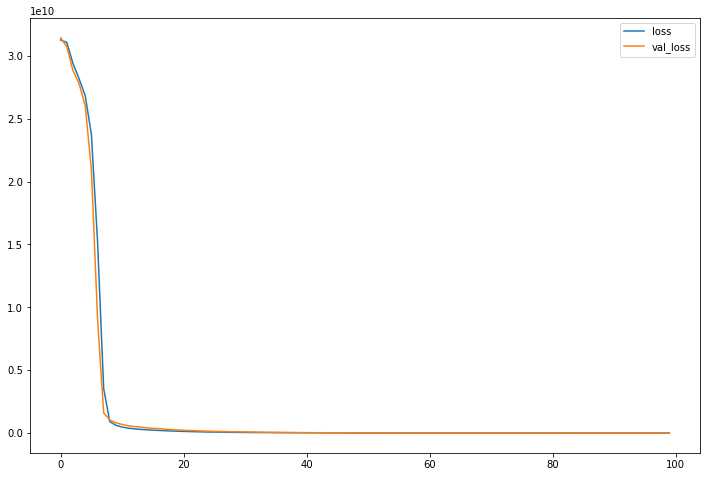

In [66]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [67]:
pred=model.predict(x_test)

41/41 [==============================] - 0s 1ms/step


In [68]:
(mean_squared_error(y_test, pred))**.5


711.317538872375

In [69]:
r2_score(y_test, pred)

0.9999825892962173